# Исследование объявлений о продаже квартир


## <u>План проекта</u>

**Обзор данных:**
* Импорт необходимых библиотек;
* Чтение файла и сохранение полученных данных в переменные;
* Получение общей информации (head, info);
* Выводы.

**Предобработка данных:**
* Корректировка типов данных (при необходимости);
* Заполнение пропусков / удаление дубликатов (при наличии);
* Обработка аномальных значений;
* Выводы.

**Категоризация данных:**
* Добавление новых признаков:
1. цена одного квадратного метра
2. день недели публикации объявления
3. тип этажа квартиры (значения — «первый», «последний», «другой»)

**Исследование данных:**
* Какая зависимость общей площади квартиры и количеством комнат?
* Какая зависимость жилой площади квартиры от метража квартиры?
* Есть ли взаимосвязь между площадью кухни и количеством комнат?
* Есть ли зависимость стоимости квартиры от количества комнат?
* Квартиры с каким колиеством  комнат продаются больше всего?
* Есть ли взаимосвязь между высотой потолков и количеством комнат?
* На каком этаже квартиры продаются чаще всего?
* Одинаково ли количество продаваемых квартир на первых, последних и других этажах?
* и прочее.

**Выводы исследования:**
* Ознакомление с данными;
* Какая была сделана корректировка;
* Исследование данных.

## Обзор данных

Импортируем библиотеки pandas, matplotlib.pyplot as plt:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

Читаем датасет. Так как данные оказались записанными одной строкой, разбиваем их на столбцы с помощью  `sep = '\t'`:

In [2]:
data = pd.read_csv('/content/real_estate_data.csv', sep = '\t')
display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Посмотрим распределение данных - выведем графики для всех столбцов датасета:

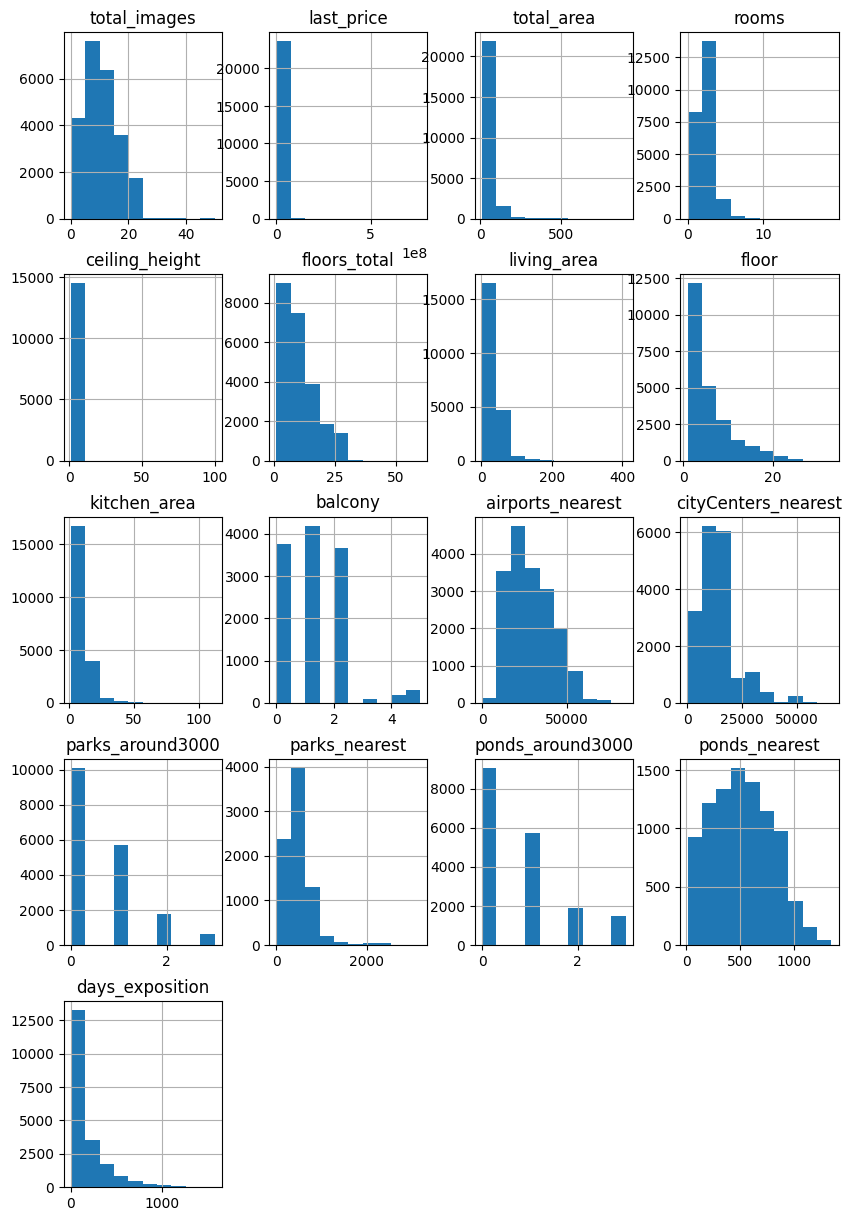

In [3]:
data.hist(figsize=(10, 15));

Выведем общую информацию - количество строк, тип данных, пропущенные значения:

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

*Вывод по изучению данных:*
1. В датасете 21 столбец и 23669 строк. Это объемная выборка для проведения исследования.
Согласно документации к данным:
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
* `balcony` — число балконов
* `ceiling_height` — высота потолков (м)
* `cityCenters_nearest` — расстояние до центра города (м)
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
* `first_day_exposition` — дата публикации
* `floor` — этаж
* `floors_total` — всего этажей в доме
* `is_apartment` — апартаменты (булев тип)
* `kitchen_area` — площадь кухни в квадратных метрах (м²)
* `last_price` — цена на момент снятия с публикации
* `living_area` — жилая площадь в квадратных метрах (м²)
* `locality_name` — название населённого пункта
* `open_plan` — свободная планировка (булев тип)
* `parks_around3000` — число парков в радиусе 3 км
* `parks_nearest` — расстояние до ближайшего парка (м)
* `ponds_around3000` — число водоёмов в радиусе 3 км
* `ponds_nearest` — расстояние до ближайшего водоёма (м)
* `rooms` — число комнат
* `studio` — квартира-студия (булев тип)
* `total_area` — общая площадь квартиры в квадратных метрах (м²)
* `total_images` — число фотографий квартиры в объявлении

2. В данных есть пропущенные значения.
3. Гистограммы показывают как распределены данные. Например:
- большее количество загруженных фото квартир - 10;
- чаще продают квартиры в 5-этажнных домах;
- чаще всего рассторяние до парка  500 метров.


### Предобработка данных

Найдем пропуски данных:

In [5]:

data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Заполним пропуски, руководствуясь логикой:
1. Если в данных о балконах пропуск, то балкова нет. Ставим "0".
2. Пропуски в столбце с признаком "апартаменты" заполним "unknow", так как среднего значения у столбца быть не может - это булево значения. "0" также не корректно ставить. Тут может быть ДА/НЕТ.
3. Столбцы с численными данным заполним средним значением.

In [6]:
data['balcony'] = data['balcony'].fillna(0)

data['is_apartment'] = data['is_apartment'].fillna('unknow')

data['living_area'] = data['living_area'].fillna(data['living_area'].median())
data['kitchen_area'] = data['kitchen_area'].fillna(data['kitchen_area'].median())
data['ponds_around3000'] = data['ponds_around3000'].fillna(data['ponds_around3000'].median())
data['parks_around3000'] = data['parks_around3000'].fillna(data['parks_around3000'].median())
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median())
data['days_exposition'] = data['days_exposition'].fillna(data['days_exposition'].median())
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

display(data.head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,unknow,...,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,unknow,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,unknow,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,30.0,9,unknow,...,9.1,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,unknow,...,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Разобираемся с потолками. В данных есть аномальные значения. Похоже, что ошибка в измерении: выбраны децеметры вместо метров.

In [7]:
data['ceiling_height'].sort_values().unique()

array([  1.  ,   1.2 ,   1.75,   2.  ,   2.2 ,   2.25,   2.3 ,   2.34,
         2.4 ,   2.45,   2.46,   2.47,   2.48,   2.49,   2.5 ,   2.51,
         2.52,   2.53,   2.54,   2.55,   2.56,   2.57,   2.58,   2.59,
         2.6 ,   2.61,   2.62,   2.63,   2.64,   2.65,   2.66,   2.67,
         2.68,   2.69,   2.7 ,   2.71,   2.72,   2.73,   2.74,   2.75,
         2.76,   2.77,   2.78,   2.79,   2.8 ,   2.81,   2.82,   2.83,
         2.84,   2.85,   2.86,   2.87,   2.88,   2.89,   2.9 ,   2.91,
         2.92,   2.93,   2.94,   2.95,   2.96,   2.97,   2.98,   2.99,
         3.  ,   3.01,   3.02,   3.03,   3.04,   3.05,   3.06,   3.07,
         3.08,   3.09,   3.1 ,   3.11,   3.12,   3.13,   3.14,   3.15,
         3.16,   3.17,   3.18,   3.2 ,   3.21,   3.22,   3.23,   3.24,
         3.25,   3.26,   3.27,   3.28,   3.29,   3.3 ,   3.31,   3.32,
         3.33,   3.34,   3.35,   3.36,   3.37,   3.38,   3.39,   3.4 ,
         3.42,   3.43,   3.44,   3.45,   3.46,   3.47,   3.48,   3.49,
      

Приведем высоту потолков в нужный масштаб:

In [31]:
data = data[(data['ceiling_height'] != 1.0) & (data['ceiling_height'] != 1.2) & (data['ceiling_height'] != 1.75) & (data['ceiling_height'] != 14.0) & (data['ceiling_height'] != 8.0) & (data['ceiling_height'] != 100.0) & (data['ceiling_height'] != 10.3)]
wrong_ceiling = [27.5, 27, 24, 26, 22.6, 20, 32, 25]
try_ceiling = [2.75, 2.7, 2.4, 2.6, 2.26, 2.0, 3.2, 2.5]
data['ceiling_height'] = data['ceiling_height'].replace(wrong_ceiling, try_ceiling)
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [9]:
display('Медианное значение потолков равно:', data['ceiling_height'].median())

'Медианное значение потолков равно:'

2.65

Переведем данные о близости к центру в километры:

In [10]:
data['cityCenters_nearest_km'] = data['cityCenters_nearest'] * 0.001

display(data.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,unknow,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,95.0,16.028
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.65,11.0,18.6,1,unknow,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,455.0,0.0,502.0,81.0,18.603
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.65,5.0,34.3,4,unknow,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,13.933
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.65,14.0,30.0,9,unknow,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,6.800
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,unknow,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,8.098


Проверим заполнение пропусков:

In [11]:
data.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name             49
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition            0
cityCenters_nearest_km     0
dtype: int64

Осталось 49 пустых значений в названиях населенного пункта. Для исследования есть почти 24000 строк. Пустые значения удаляем.

In [12]:
data = data.dropna ()
data = data.reset_index(drop=True)

Изменим тип данных с float на int в колонках, где не важны дробные части. Например, покупателю все равно до парка идти 1км или
1км100м.
Оставим дробный тип данных на важных колонках: площадь квартиры, жилая, кухня. Так как дробная часть стоит дороже округленной.

Также изменим формат времени в даннных `first_day_exposition` - дата публикации объявления.

In [13]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

cols = ['balcony', 'days_exposition', 'floors_total', 'last_price', 'parks_around3000', 'parks_nearest', 'cityCenters_nearest', 'airports_nearest', 'ponds_nearest']
for col in cols:
    data[col] = data[col].astype(int)

display(data.head())

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,unknow,...,0,Санкт-Петербург,18863,16028,1,482,2.0,755,95,16.028
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,unknow,...,2,посёлок Шушары,12817,18603,0,455,0.0,502,81,18.603
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,unknow,...,0,Санкт-Петербург,21741,13933,1,90,2.0,574,558,13.933
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,unknow,...,0,Санкт-Петербург,28098,6800,2,84,3.0,234,424,6.800
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,unknow,...,0,Санкт-Петербург,31856,8098,2,112,1.0,48,121,8.098


### Категоризация данных

Добавим данные:
- цена одного квадратного метра;
- день недели публикации;
- тип этажа квартиры.

In [14]:
data['metr_price'] = data['last_price']/data['total_area']

data['week_exposition'] = data ['first_day_exposition'].dt.weekday
data['mont_exposition'] = data ['first_day_exposition'].dt.month
data['year_exposition'] = data ['first_day_exposition'].dt.year

def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_type, axis=1)

display(data.head())


,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,metr_price,week_exposition,mont_exposition,year_exposition,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,unknow,...,482,2.0,755,95,16.028,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,unknow,...,455,0.0,502,81,18.603,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,unknow,...,90,2.0,574,558,13.933,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,unknow,...,84,3.0,234,424,6.800,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,unknow,...,112,1.0,48,121,8.098,100000.000000,1,6,2018,другой


### Исследовательский анализ данных

<u>Какая зависимость общей площади квартиры и количеством комнат?</u>

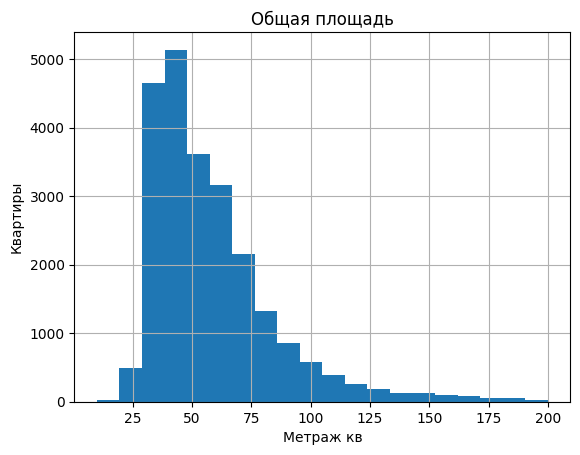

,total_area
rooms,
0,26.05
1,36.53
2,53.00
3,72.90
4,99.50
5,146.45
6,184.30
7,214.00
8,235.70


In [15]:
data['total_area'].hist(bins = 20, range = (10, 200))
plt.title('Oбщая площадь')
plt.xlabel('Метраж кв')
plt.ylabel('Квартиры')
plt.show()

data.pivot_table(index = 'rooms', values ='total_area', aggfunc = 'median')


Основную часть квартир на продажу составляют одно-двухкомнатные квартиры.

<u>Какая зависимость жилой площади квартиры от метража квартиры?</u>

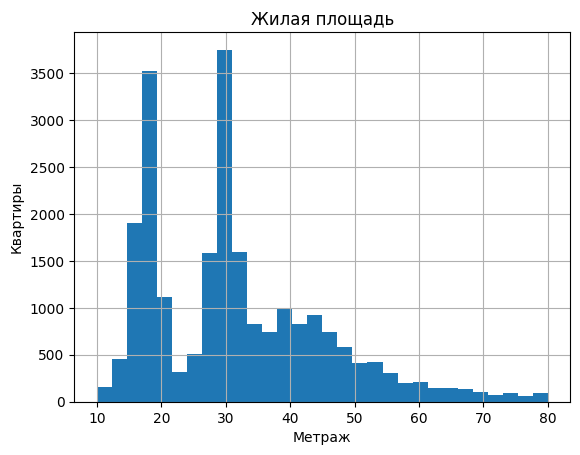

,living_area
rooms,
0,18.00
1,18.00
2,30.00
3,44.00
4,61.70
5,89.35
6,122.00
7,142.00
8,161.00


In [16]:
data['living_area'].hist(bins = 30, range = (10, 80))
plt.title('Жилая площадь')
plt.xlabel('Метраж')
plt.ylabel('Квартиры')
plt.show()

data.pivot_table(index = 'rooms', values ='living_area', aggfunc = 'median')

Гистограмма имеет две вершины, так как у нас основная масса квартир в продаже однушки и двушки:
первый пик принадлежит однокомнатным квартирам, второй - двухкомнатным.
0 комнат похожи на студии. Информации по ним мало, поэтому только предположение.

<u>Есть ли взаимосвязь между площадью кухни и количеством комнат?</u>

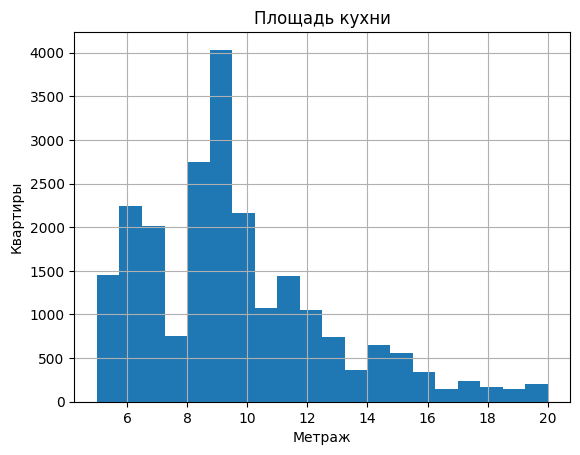

,kitchen_area
rooms,
0,9.10
1,9.10
2,9.00
3,9.10
4,10.50
5,14.40
6,18.70
7,18.00
8,23.10


In [17]:
data['kitchen_area'].hist(bins = 20, range = (5, 20))
plt.title('Площадь кухни')
plt.xlabel('Метраж')
plt.ylabel('Квартиры')
plt.show()

data.pivot_table(index = 'rooms', values ='kitchen_area', aggfunc = 'median')

Квартиры с 1-3 комнатами и студии (0) чаще всего имеют кухню 9 метров.


<u>Есть ли зависимость стоимости квартиры от количества комнат?</u>

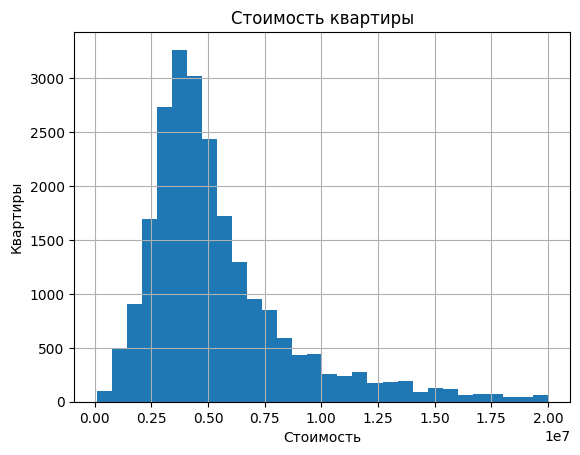

,last_price
rooms,
0,2700000
1,3600000
2,4770000
3,6200000
4,9000000
5,14000000
6,19000000
7,24900000
8,23095000


In [18]:
data['last_price'].hist(bins = 30, range = (100000, 20000000))
plt.title('Стоимость квартиры')
plt.xlabel('Стоимость')
plt.ylabel('Квартиры')
plt.show()

data.pivot_table(index = 'rooms', values ='last_price', aggfunc = 'median')

Продается больше одно-двухкомнатные квартиры. Они самые дешевые.

<u>Квартиры с каким колиеством  комнат продаются больше всего?</u>

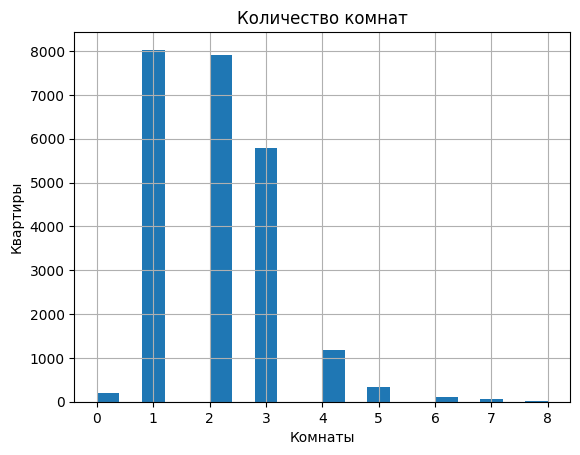

,total_area
rooms,
0,197
1,8032
2,7920
3,5796
4,1175
5,326
6,105
7,59
8,12


In [19]:
data['rooms'].hist(bins = 20, range = (0, 8))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Квартиры')
plt.show()

data.pivot_table(index = 'rooms', values ='total_area', aggfunc = 'count')

Чаще всего продаются одно-двухкомнатные квартиры.

<u>Есть ли взаимосвязь между высотой потолков и количеством комнат?</u>

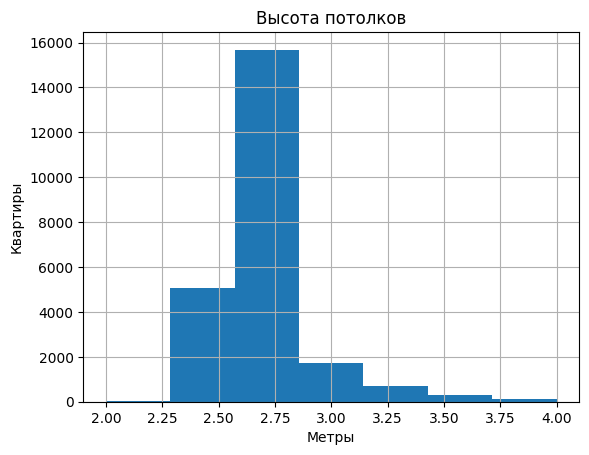

,median,count
,ceiling_height,ceiling_height
rooms,,
0,2.650,197
1,2.650,8032
2,2.650,7920
3,2.650,5796
4,2.650,1175
5,2.930,326
6,3.000,105
7,3.300,59


In [20]:
data['ceiling_height'].hist(bins = 7, range = (2, 4))
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Квартиры')
plt.show()


data.pivot_table(index = 'rooms', values = 'ceiling_height', aggfunc = ['median', 'count'])

Потолки высотой от 2,65 од 2,80 принадлежат в основном одно-двухкомнатные квартирам.

<u>На каком этаже квартиры продаются чаще всего?</u>

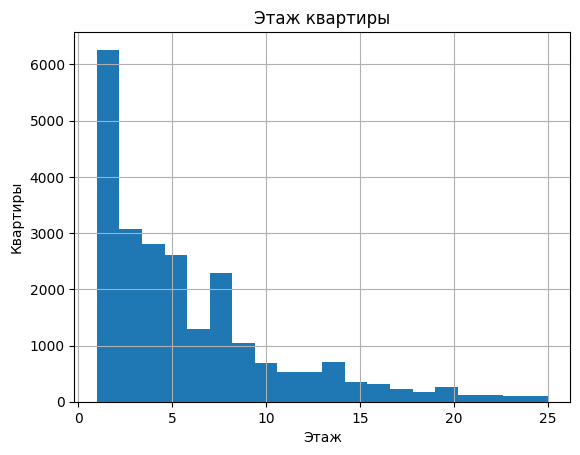

In [21]:
data['floor'].hist(bins = 20, range = (1, 25))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Квартиры')
plt.show()


Больше всего квартир продается на 2 этаже.

<u>Одинаково ли количество продаваемых квартир на первых, последних и других этажах?</u>

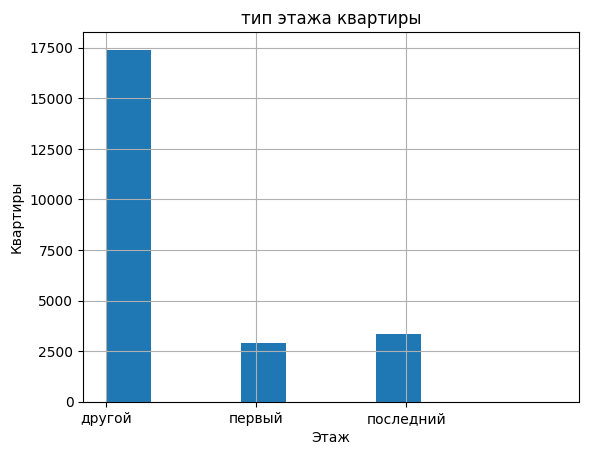

,rooms
floor_type,
другой,17397
первый,2910
последний,3334


In [22]:
data['floor_type'].hist(bins = 10, range = (0, 3))
plt.title('тип этажа квартиры')
plt.xlabel('Этаж')
plt.ylabel('Квартиры')
plt.show()

data.pivot_table(index = 'floor_type', values = 'rooms', aggfunc = 'count')

Нет. В основном продают квартиры на "удобных" этажах: не на первом и последнем.

<u>Сколько этажей в домах, где чаще всего продают квартиры?</u>

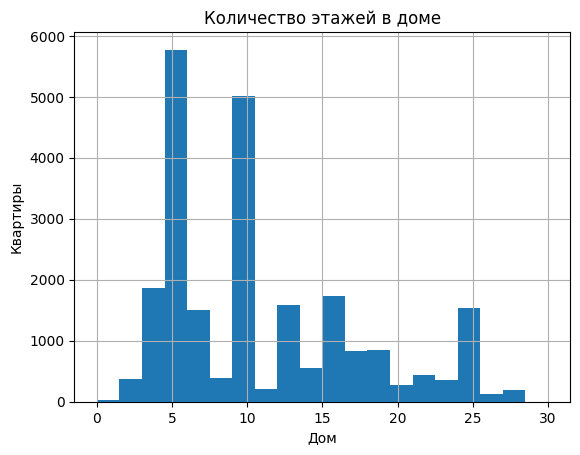

In [23]:
data['floors_total'].hist(bins = 20, range = (0, 30))
plt.title('Количество этажей в доме')
plt.xlabel('Дом')
plt.ylabel('Квартиры')
plt.show()


Квартиры продаются в основном в пятиэтажных домах и 10этажных.

<u>На каком расстоянии от центра города чаще всего продают квартиры?</u>

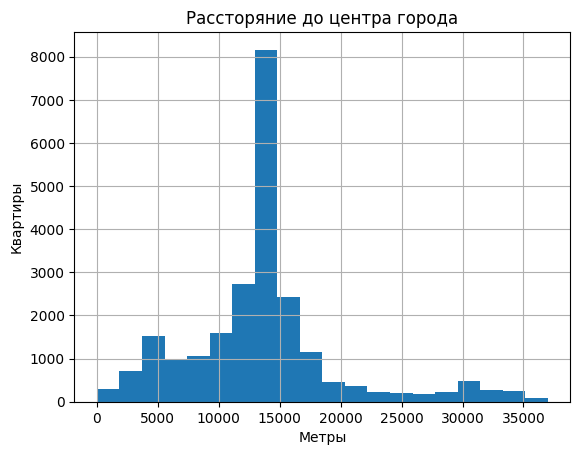

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cityCenters_nearest_km,metr_price,week_exposition,mont_exposition,year_exposition,floor_type
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,unknow,...,482,2.0,755,95,16.028,120370.370370,3,3,2019,другой
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,unknow,...,455,0.0,502,81,18.603,82920.792079,1,12,2018,первый
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,unknow,...,90,2.0,574,558,13.933,92785.714286,3,8,2015,другой
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,unknow,...,84,3.0,234,424,6.800,408176.100629,4,7,2015,другой
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,unknow,...,112,1.0,48,121,8.098,100000.000000,1,6,2018,другой


In [24]:
data['cityCenters_nearest'].hist(bins = 20, range = (0, 37000))
plt.title('Рассторяние до центра города')
plt.xlabel('Метры')
plt.ylabel('Квартиры')
plt.show()

display(data.head(5))

Расстояние до центра 15км.

<u>На каком расстоянии от аэропорта чаще всего продают квартиры?</u>

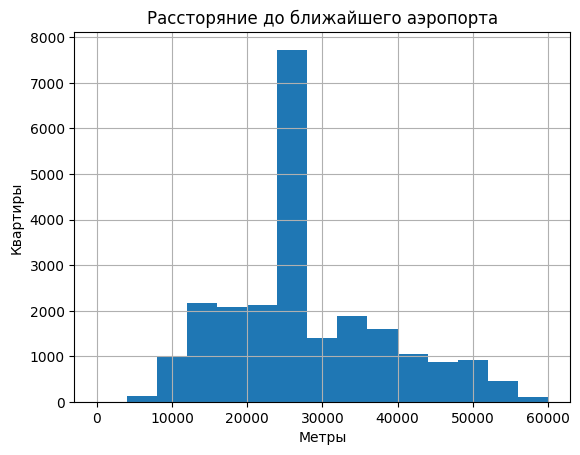

,airports_nearest
locality_name,
Бокситогорск,26726.0
Волосово,26726.0
Волхов,26726.0
Всеволожск,26726.0
Выборг,26726.0
...,...
село Путилово,26726.0
село Рождествено,26726.0
село Русско-Высоцкое,26726.0


In [25]:
data['airports_nearest'].hist(bins = 15, range = (0, 60000))
plt.title('Рассторяние до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Квартиры')
plt.show()

data.pivot_table(index = 'locality_name', values = 'airports_nearest')


Среднее расстояние до аэропорта 25км.

<u>На каком расстоянии от парка чаще всего продают квартиры?</u>

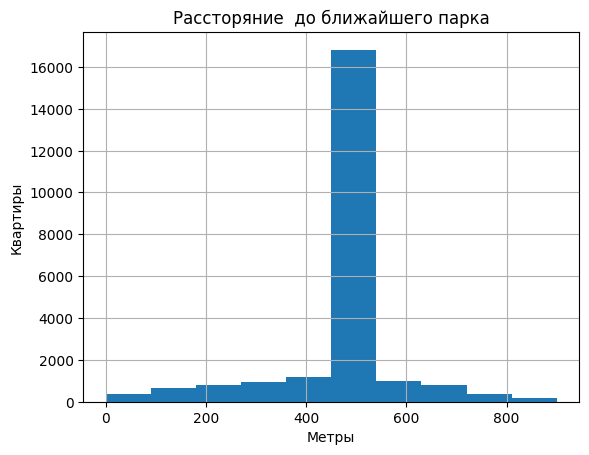

In [26]:
data['parks_nearest'].hist(bins = 10, range = (0, 900))
plt.title('Рассторяние  до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Квартиры')
plt.show()

Квартиры расположены в пешей доступности от парка. Всего 500 метров.

<u>В какое время года и в какие дни недели больше публикуется объявлений о продаже квартир?</u>

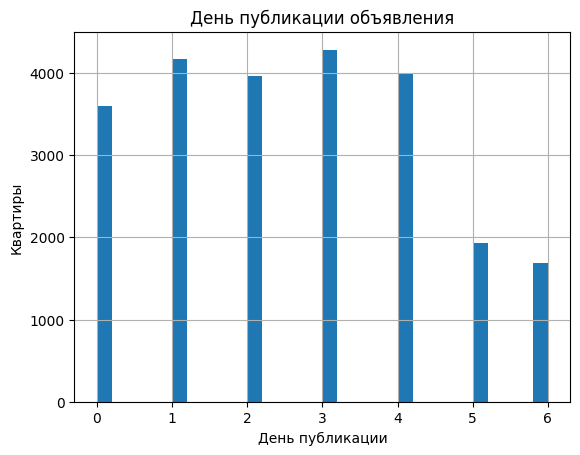

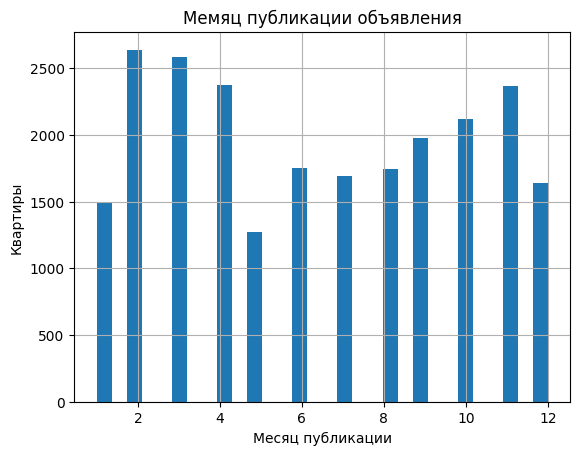

In [27]:
data['week_exposition'].hist(bins = 30, range = (0, 6))
plt.title('День публикации объявления')
plt.xlabel('День публикации')
plt.ylabel('Квартиры')
plt.show()


data['mont_exposition'].hist(bins = 30, range = (1, 12))
plt.title('Мемяц публикации объявления')
plt.xlabel('Месяц публикации')
plt.ylabel('Квартиры')
plt.show()

Чаще всего пубикуют объявления о продажах в будние дни.
Больше публикаций весной.

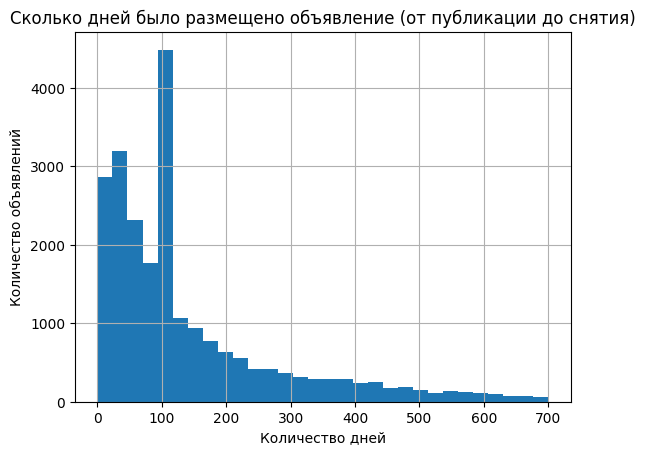

count    23641.000000
mean       169.208071
std        206.562258
min          1.000000
25%         45.000000
50%         95.000000
75%        198.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [28]:
data['days_exposition'].hist(bins = 30, range = (0, 700))
plt.title('Сколько дней было размещено объявление (от публикации до снятия)')
plt.xlabel('Количество дней')
plt.ylabel('Количество объявлений')
plt.show()
data['days_exposition'].describe()


Объявления висят около 3 месяцев перед продажей - 95 дней.
Удачная продажа - 45 дней
Неудачная - 198 дней.

Изучим коррелляцию:

/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:887: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


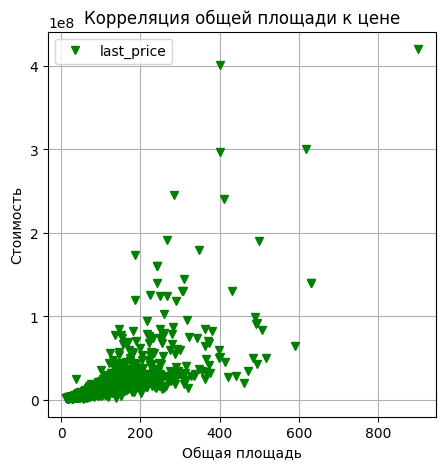

,last_price,total_area
last_price,1.000000,0.738653
total_area,0.738653,1.000000


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:887: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


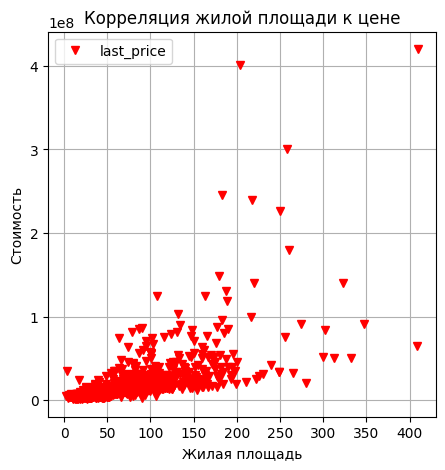

,last_price,living_area
last_price,1.000000,0.634787
living_area,0.634787,1.000000


/usr/local/lib/python3.10/dist-packages/pandas/plotting/_matplotlib/core.py:887: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "o" (-> marker='o'). The keyword argument will take precedence.
  return ax.plot(*args, **kwds)


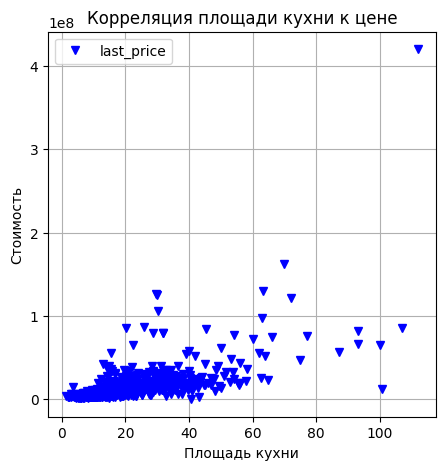

,kitchen_area,last_price
kitchen_area,1.00000,0.31209
last_price,0.31209,1.00000


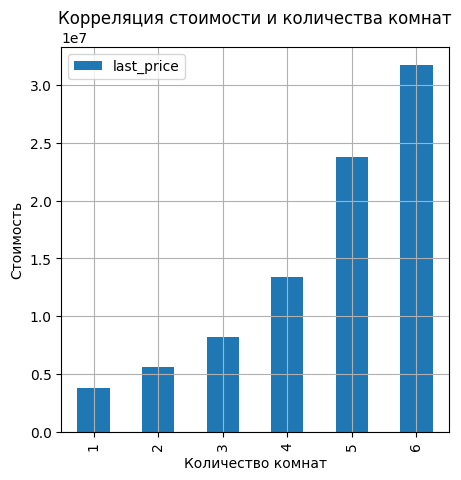

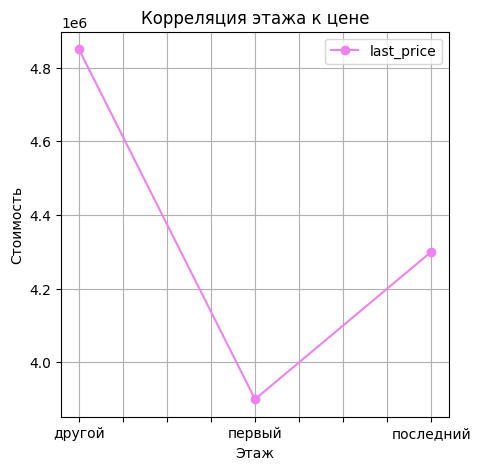

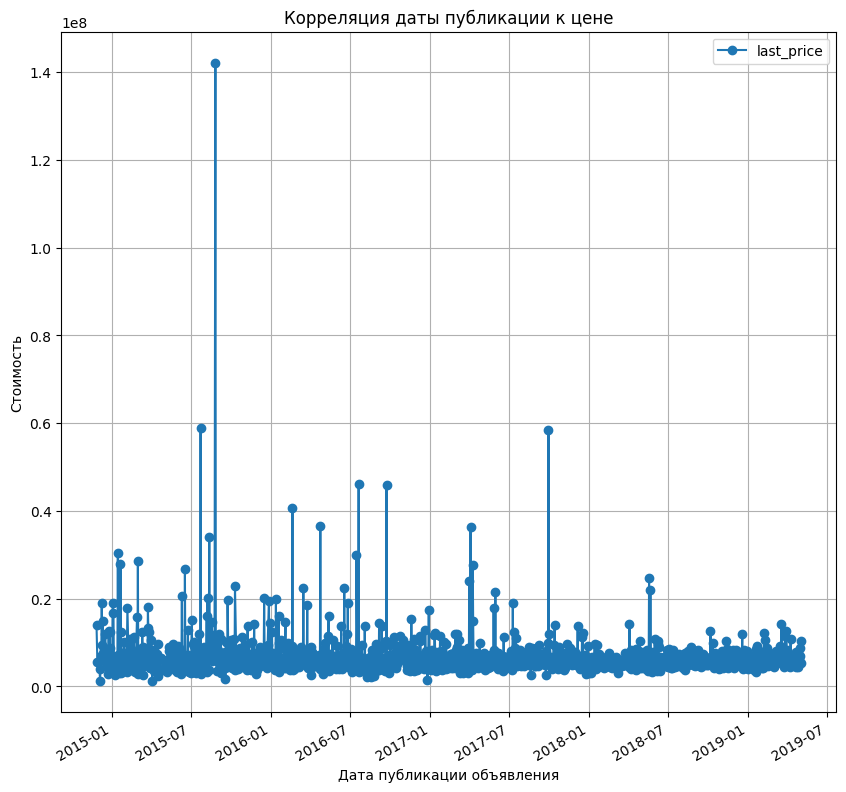

In [29]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style = 'o', marker = 'v', c = 'green', figsize=(5, 5))
plt.title('Корреляция общей площади к цене')
plt.xlabel('Общая площадь')
plt.ylabel('Стоимость')
plt.show()
display(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr())


data.pivot_table(index='living_area', values='last_price').plot(grid=True, style = 'o', marker = 'v', c = 'red', figsize=(5, 5))
plt.title('Корреляция жилой площади к цене')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость')
plt.show()
display(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr())


data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style = 'o', marker = 'v', c = 'blue', figsize=(5, 5))
plt.title('Корреляция площади кухни к цене')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость')
plt.show()
display(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr())

data.query('rooms > 0 and rooms < 7').pivot_table(index='rooms', values='last_price').plot(grid=True, kind='bar', figsize=(5, 5))
plt.title('Корреляция стоимости и количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.show()

data.pivot_table(index='floor_type', values='last_price', aggfunc = 'median').plot(grid=True, style = 'o-', c = 'violet', figsize=(5, 5))
plt.title('Корреляция этажа к цене')
plt.xlabel('Этаж')
plt.ylabel('Стоимость')
plt.show()

data.pivot_table(index='first_day_exposition', values='last_price').plot(grid=True, style = 'o-', figsize=(10, 10))
plt.title('Корреляция даты публикации к цене')
plt.xlabel('Дата публикации объявления')
plt.ylabel('Стоимость')
plt.show()

1. Чем меньше площадь квартиры, тем меньше цена.
2. Корреляция жилой площади и кухни с ценой - мало зависят друг от друга.
3. Чем больше комнат, тем дороже стоимость квартиры.
4. Первый этаж стоит дешевле.
5. С 2015 года наблюдается небольшое снижение продаж квартир в принципе. Пики стоимости квартир - конец лета/осень. Весной стоимность немного снижается.

Определим топ-10 дорогих населённых пунктов:

In [30]:
city_big_metr = data['locality_name'].value_counts().head(10)
big_price = data.query('locality_name in (@city_big_metr.index)').pivot_table(values='last_price', index='locality_name')
big_price = big_price.astype(int)
display(big_price.sort_values('last_price', ascending=False))


,last_price
locality_name,
Санкт-Петербург,8062938
Пушкин,6469035
посёлок Парголово,4488074
деревня Кудрово,4234157
посёлок Шушары,4108081
Колпино,3964021
Всеволожск,3789067
посёлок Мурино,3672049
Гатчина,3488336


Дороже всего стоимость метра кв в Санкт-Петербурге.
Дешевле - Выборг.

## Выводы исследования


1. Был предоставлен датасет размером более 23000 строк: даннные о продажах квартир.
2. Датасет был изменён: изменён тип данных, аномалии, заполнены пропуски данных медианным, нулевым и 'unknow' значениями.
3. Исследование данных показало:
### Про квартиры.
1. Больше всего продается квартир в Санкт-Петербурге
2. Основную часть составляют 1-2 комнатные квартиры. Они же дешевле всех остальных в цене.
3. Продаются они в основном в домах 5 и 10 этажей.
4. На стоимость влияет общая площадь, но не размер жилой площади или кухни.
5. Расположение квартир похоже на спальные районы: 15 км от центра, 25 км от аэропорта и 500м до парка.

### Про стоимость.
1. Самые дорогие квартиры в Санкт-Петербурге из топ-10 населенных пунктов. Самые дешевые в Выборге.
2. Квартиры на 1 этаже стоят дешевлле.


### Про размещение объявлений.
1. Длительность размещения объявлений в среднем 3 месяца. Хорошей продажей считается 1,5 месяца. Плохой - до 7 месяцев.
2. Публикуют объявления в рабочие дни. Пик приходится на вторник и четверг. По месяцам - предпочитают размещать объявления февраль-март. К лету идет спад размещения и к осени вновь увеличивается количество объявлений.
2. С 2015 года наблюдается небольшое снижение продаж квартир в принципе. Пики  стоимости квартир - конец лета/осень. Весной стоимность немного снижается.



